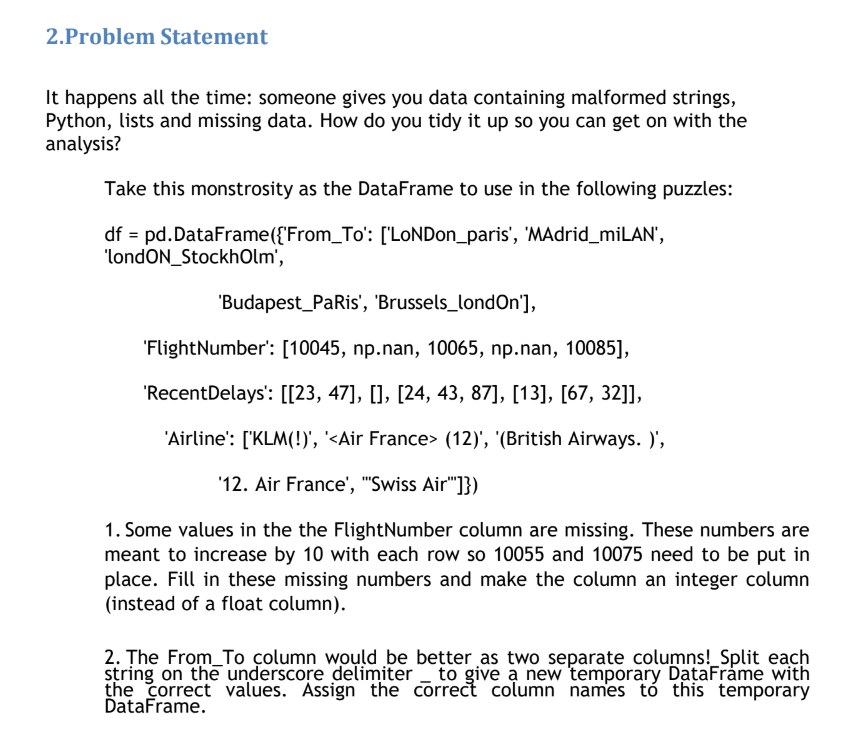

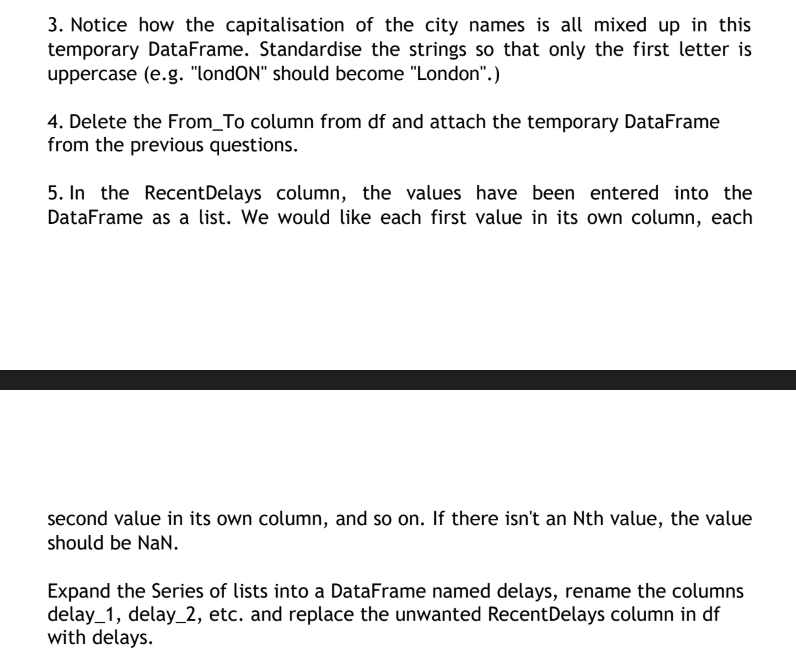

In [42]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

In [43]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From_To       5 non-null      object 
 1   FlightNumber  3 non-null      float64
 2   RecentDelays  5 non-null      object 
 3   Airline       5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes


1. Some values in the the FlightNumber column are missing. These numbers are
meant to increase by 10 with each row so 10055 and 10075 need to be put in
place. Fill in these missing numbers and make the column an integer column
(instead of a float column).

In [45]:
# for i in range(1, df['FlightNumber'].count() + 1):
#       if pd.isnull(df.loc[i,'FlightNumber']):
#             df.loc[i, 'FlightNumber'] = df.loc[i-1, 'FlightNumber'] + 10

In [46]:
for i in range(1, df['FlightNumber'].count() + 1):
    if pd.isnull(df.loc[i,'FlightNumber']):
        df.loc[i,'FlightNumber'] = df.loc[i-1,'FlightNumber']+10

In [47]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


2 - The From_To column would be better as two separate columns! Split each
string on the underscore delimiter _ to give a new temporary DataFrame with
the correct values. Assign the correct column names to this temporary
DataFrame.

In [48]:
df2 = pd.DataFrame(df.From_To.str.split("_").tolist(), columns="From To".split())
df2

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3 - Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)

In [64]:
df2.From= df2.From.str.capitalize()
df2.To=df2.To.str.capitalize()
df2

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4 - Delete the From_To column from df and attach the temporary DataFrame
from the previous questions.

In [ ]:
df.drop(columns=['From_To'],inplace=True)

In [73]:
df

,FlightNumber,RecentDelays,Airline
0,10045.0,"[23, 47]",KLM(!)
1,10055.0,[],<Air France> (12)
2,10065.0,"[24, 43, 87]",(British Airways. )
3,10075.0,[13],12. Air France
4,10085.0,"[67, 32]","""Swiss Air"""


In [74]:
df[['From','To']] = df2[['From','To']]

In [75]:
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


5 -In the RecentDelays column, the values have been entered into the dataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value
should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.

In [114]:
df3 = pd.DataFrame(df['RecentDelays'].values.tolist())

In [ ]:
df3.rename(columns={0: "delay_1", 1: "delay_2",2:"delay_3"},inplace=True)

In [117]:
df3

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [118]:
df[['delay_1','delay_2','delay_3']] = df3[['delay_1','delay_2','delay_3']]

In [121]:
df.drop(columns=['RecentDelays'])

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045.0,KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
